# Pymaceuticals Inc.
---

### Analysis

-Analysis: The drugs Capomulin and Ramicane seem to have been observed over more timepoints than the other drugs. I would say that Capomulin and Ramicane have been observed at least 40 more times than any of the other drugs. There is a fairly even distribution of male and female mice across the entire study. We also see that according to the scatter plot and accompanying regression line, an increase in mouse weight is correlated with a increase in tumor volume. This correlation is confirmed by the fact that the r-value is approximately .84 and the p-value is practically 0, that is the correlation is strongly positive and not likely to be random chance.

Regarding the four regimens used to create the box plots, both Capomulin and Ramicane show noticeably smaller final tumor volumes than Infubinol and Ceftamin. The data for neither Capomulin nor Ramicane contains any outliers. Ramicane has a lower median final tumor volume, an overall lower final tumor volume, and lower lower bound for the IQR than Capomulin. With regard to the final tumor volume it appears that Ramicane is slightly more effective, but not massively so. According to the line plot, Capomulin does decrease the tumor volume, but this line plot only accounts for one mouse, and the decrease is not observed until after 20 days of treatment. It would be helpful to observe how long it takes Capomulin to take effect in more mice. These could all be plotted on the same chart. Line charts for the other drugs should also be created for comparitive purposes.
 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

merged_df = mouse_df.merge(study_df, how='right', on = 'Mouse ID')

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [85]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [86]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_id = duplicate['Mouse ID'].unique()
duplicate_id


array(['g989'], dtype=object)

In [87]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Looping through the dataframe containing the duplicate mouse data and drop them
# one-by-one from merged_df.

for item in duplicate_id:
    merged_df = merged_df.drop(merged_df[merged_df['Mouse ID'] == item].index)
        
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [89]:
# Checking the number of mice in the clean DataFrame.
len(merged_df["Mouse ID"].unique())

248

## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


# Getting the mean, median, variance, standard deviation, and standard error for tumor volume
# according to drug regimen.

avg_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()


med_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()


var_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()


std_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()


sem_tumor = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Place the above results back into dataframes, reset the index, and rename a column.

avg_tumor = pd.DataFrame(avg_tumor).reset_index()
avg_tumor.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume"}, inplace = True)

med_tumor = pd.DataFrame(med_tumor).reset_index()
med_tumor.rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume"}, inplace = True)

var_tumor = pd.DataFrame(var_tumor).reset_index()
var_tumor.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Variance"}, inplace = True)

std_tumor = pd.DataFrame(std_tumor).reset_index()
std_tumor.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Dev."}, inplace = True)

sem_tumor = pd.DataFrame(sem_tumor).reset_index()
sem_tumor.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Err."}, inplace = True)

# Merge the above dataframes into a single summary dataframe.

df1 = avg_tumor.merge(med_tumor, how = 'right')
df1

df2 = df1.merge(var_tumor, how = 'right')
df2

df3 = df2.merge(std_tumor, how = 'right')
df3

summary_df = df3.merge(sem_tumor, how = 'right')




In [91]:
# Show the summary data frame.
summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [92]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_table_df = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']))
summary_table_df = summary_table_df.rename(columns = {"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "sem":"Tumor Volume Std. Err."})
summary_table_df.reset_index()

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [93]:
# Getting the count of Timepoints for each drug regimen
time_counts = merged_df.groupby("Drug Regimen")["Timepoint"].count()

# Assemble time_counts into a dataframe, reset the index, and sort the values.
time_counts_df = pd.DataFrame(time_counts)
time_counts_df = time_counts_df.reset_index()
time_counts_df = time_counts_df.sort_values(by = 'Timepoint', ascending = False)
time_counts_df


,Drug Regimen,Timepoint
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


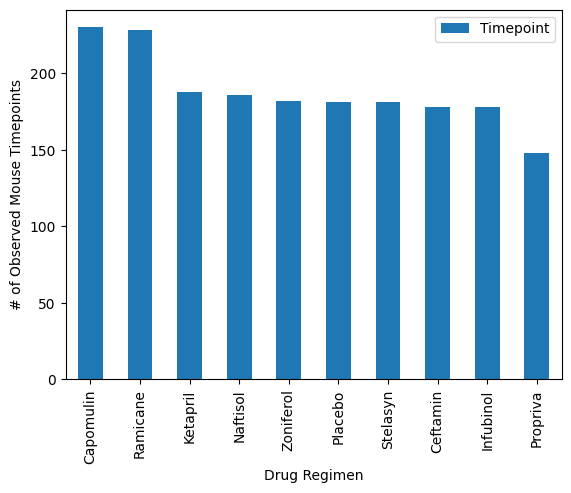

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create bar chart from time_counts_df. 
time_counts_df.plot.bar(x='Drug Regimen', y='Timepoint', ylabel = '# of Observed Mouse Timepoints');

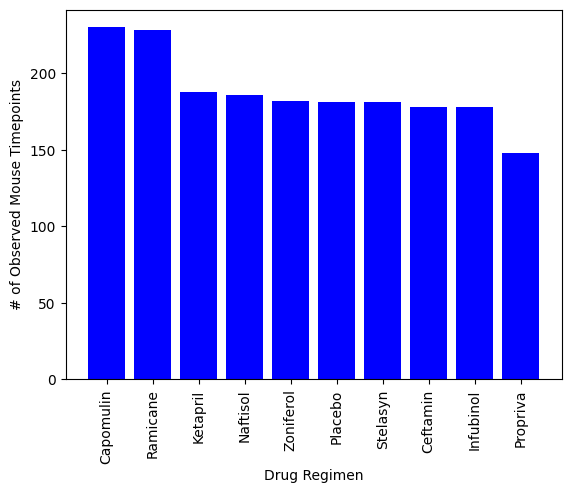

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create lists from the Drug Regimen and Timepoint columns of time_counts_df.
drug = time_counts_df["Drug Regimen"].tolist()
timepoints = time_counts_df["Timepoint"].tolist()

# Create the bar chart.

plt.bar(drug, timepoints, color = "blue", width = 0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show;

In [96]:
# Count the distribution of sex among the mice and place into a dataframe.
sex_distribution = pd.DataFrame(merged_df.value_counts("Sex"))

sex_distribution

,count
Sex,
Male,958
Female,922


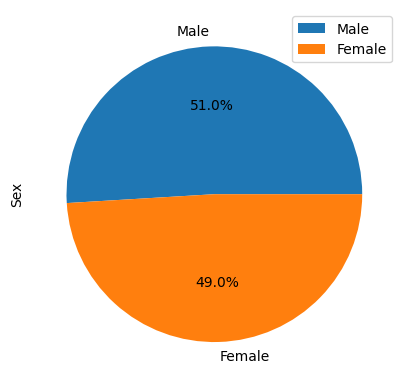

In [97]:
# Using Pandas to create a pie chart showing the distribution of male vs. female mice as a percent.
sex_distribution.plot.pie(y = 'count', ylabel = 'Sex', autopct='%1.1f%%');

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


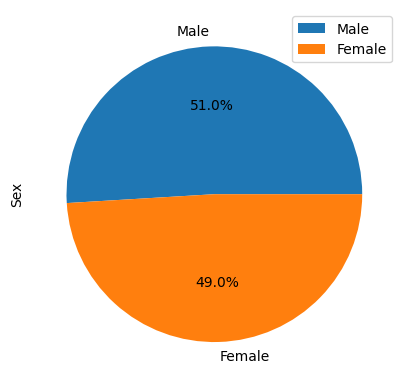

In [99]:
# Using pyplot to create a pie chart showing the distribution of male vs. female mice as a percent.
# Must reset the index for this to work.

labels = ['Male', 'Female']
sex_distribution2 = sex_distribution.reset_index()
plt.pie(sex_distribution2['count'], labels = sex_distribution2['Sex'], autopct='%1.1f%%')

labels = ['Male', 'Female']
plt.legend(labels, loc = 'best')
plt.ylabel('Sex')
plt.show();

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df = max_timepoint_df.reset_index()
max_timepoint_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_df = max_timepoint_df.merge(merged_df, how = 'left', on = ['Mouse ID', 'Timepoint'])
new_merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



#Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# For loop to populate tumor_vol, calculate IQR, and find outliers.
for t in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = new_merged_df.loc[new_merged_df["Drug Regimen"] == t]
    tumor_list = drug_df["Tumor Volume (mm3)"].tolist()
    tumor_vol.append(tumor_list)

    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Q1 = drug_df["Tumor Volume (mm3)"].quantile(0.25)
    Q3 = drug_df["Tumor Volume (mm3)"].quantile(0.75)
    IQR = Q3 - Q1
    
    #Determine outliers using upper and lower bounds
    outliers = drug_df[((drug_df["Tumor Volume (mm3)"] < (Q1 - 1.5 * IQR)) | (drug_df["Tumor Volume (mm3)"] > (Q3 + 1.5 * IQR)))]
    
    print(f"{t}'s Potential Outliers: {outliers['Tumor Volume (mm3)']}")

 
    

Capomulin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


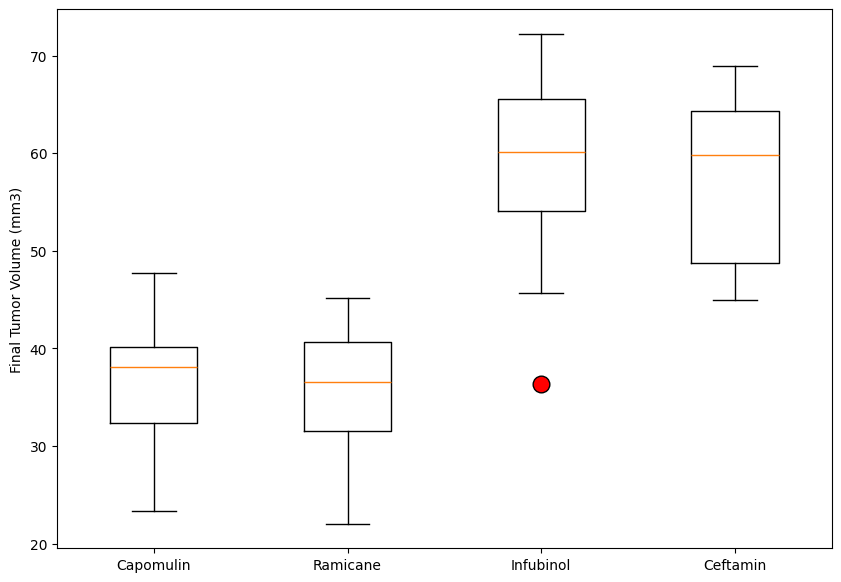

In [102]:
# Create boxplot for the distribution of the tumor volume for each treatment group.

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating plot
bp = ax.boxplot(tumor_vol, flierprops = dict(markerfacecolor = "red", markersize = 12))
ax.set_xticklabels(treatments)
plt.ylabel("Final Tumor Volume (mm3)")

# show plot
plt.show()

## Line and Scatter Plots

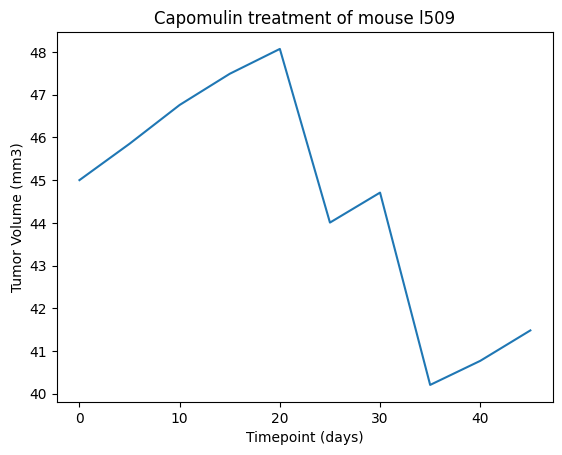

In [103]:
# Line plot for capomulin treatment of mouse l509
# Isolate the rows where Mouse ID is l509
l509 = merged_df.loc[merged_df["Mouse ID"] == 'l509']

# Line plot
plt.plot(l509["Timepoint"], l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)");

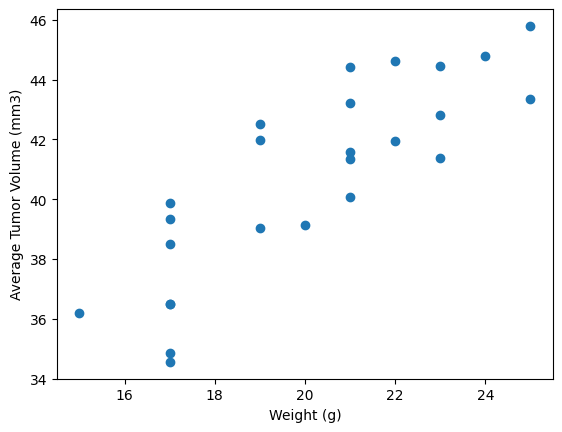

In [104]:
# Scatter plot comparing average weight of each mouse to average tumor volume.

# Isolate rows by Drug Regimen equals Capomulin
capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and get average weight.
# Put into dataframe, reset index, convert Weight (g) column to list.
mouse_weight_df = capomulin.groupby("Mouse ID")["Weight (g)"].mean()
mouse_weight_df = pd.DataFrame(mouse_weight_df)

mouse_weight_df.reset_index()

mouse_weight = mouse_weight_df["Weight (g)"].tolist()


# Group by Mouse ID and get average tumor volume.
# Put into dataframe, reset index, convert Tumor Volume (mm3) column to list.
obs_volume_df = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

obs_volume_df = pd.DataFrame(obs_volume_df)

obs_volume_df.reset_index()

obs_volume = obs_volume_df["Tumor Volume (mm3)"].tolist()


# Create scatter plot
plt.scatter(mouse_weight, obs_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()





## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721.
0.8419363424694721
1.3225722434712404e-07


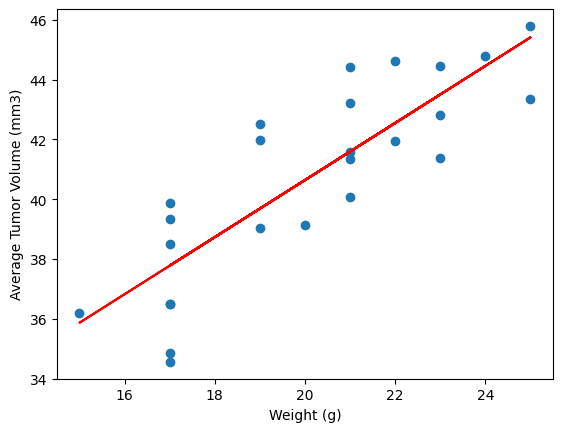

In [105]:
# Unpack slope, intercept, rvalue, pvalue, standard error using linregress.

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, obs_volume)

print(f"The correlation between mouse weight and the average tumor volume is {rvalue}.")
print(rvalue)
print(pvalue)

# Create scatter plot
plt.scatter(mouse_weight, obs_volume)

# Convert mouse_weight and obs_volume into Numpy arrays
x = np.array(mouse_weight)
y = np.array(obs_volume)

# adding the regression line to the scatter plot
plt.plot(x, slope * x + intercept, color = 'red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()